In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold

import joblib
import os
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:

# Load datasets
X_train = pd.read_csv('./datasets/UNSW_NB15/X_train.csv')
X_test = pd.read_csv('./datasets/UNSW_NB15/X_test.csv')
y_attack_cat_train = pd.read_csv('./datasets/UNSW_NB15/y_attack_cat_train.csv')
y_attack_cat_test = pd.read_csv('./datasets/UNSW_NB15/y_attack_cat_test.csv')
y_label_train = pd.read_csv('./datasets/UNSW_NB15/y_label_train.csv')
y_label_test = pd.read_csv('./datasets/UNSW_NB15/y_label_test.csv')


# Remove constant features
numerical_cols = X_train.select_dtypes(include=[np.number]).columns
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_train[numerical_cols])
dropable_const_cols = numerical_cols[[not col for col in var_thres.get_support()]]
X_train = X_train.drop(dropable_const_cols, axis=1)
X_test = X_test.drop(dropable_const_cols, axis=1)

# Remove correlated features
correlation_matrix = X_train[numerical_cols].corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
correlated_features = [column for column in upper.columns if any(upper[column] > 0.95)]
X_train = X_train.drop(correlated_features, axis=1)
X_test = X_test.drop(correlated_features, axis=1)

# Encoding
label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])
    label_encoders[column] = le

if set(X_train.columns) != set(X_test.columns):
    print("Columns in train and test sets do not match.")
else:
    print("Columns in train and test sets match.")


print("X_train info:")
print(X_train.info())
print("\nX_test info:")
print(X_test.info())

Columns in train and test sets match.
X_train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206138 entries, 0 to 206137
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                206138 non-null  float64
 1   proto              206138 non-null  int64  
 2   service            206138 non-null  int64  
 3   state              206138 non-null  int64  
 4   spkts              206138 non-null  int64  
 5   dpkts              206138 non-null  int64  
 6   rate               206138 non-null  float64
 7   sttl               206138 non-null  int64  
 8   dttl               206138 non-null  int64  
 9   sload              206138 non-null  float64
 10  dload              206138 non-null  float64
 11  sinpkt             206138 non-null  float64
 12  dinpkt             206138 non-null  float64
 13  sjit               206138 non-null  float64
 14  djit               206138 non-null  float64
 15 

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


# Define classifiers
classifiers = {
    'MultinomialNB': MultinomialNB(),
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'MLP Classifier': MLPClassifier(max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [ ]:
import joblib
import os
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt


# Initialize results dictionary
results = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'F1 Score': [],
    'Model Size (bytes)': []
}


for name, clf in classifiers.items():
    
    clf.fit(X_train, y_label_train.values.ravel())
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_label_test, y_pred)
    precision = precision_score(y_label_test, y_pred, average='weighted')
    f1 = f1_score(y_label_test, y_pred, average='weighted')
    
    model_filename = os.path.join('joblib', f"{name.replace(' ', '_')}_model.joblib")
    joblib.dump(clf, model_filename)
    model_size = os.path.getsize(model_filename)
    
    results['Classifier'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['F1 Score'].append(f1)
    results['Model Size (bytes)'].append(model_size)
    
    # # Print the results
    # print(f"{name}:")
    # print(f"  Accuracy: {accuracy:.4f}")
    # print(f"  Precision: {precision:.4f}")
    # print(f"  F1 Score: {f1:.4f}")
    # print(f"  Model Size: {model_size} bytes\n")

results_df = pd.DataFrame(results)

print(results_df)



/home/rsunketa/.venv/lib64/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


            Classifier  Accuracy  Precision  F1 Score  Model Size (bytes)
0        MultinomialNB  0.739109   0.803758  0.743386                2519
1           GaussianNB  0.780305   0.798753  0.759556                2503
2          BernoulliNB  0.726050   0.779722  0.731063                2535
3        Decision Tree  0.930145   0.930153  0.930149             1442121
4             AdaBoost  0.918832   0.918581  0.918661               34164
5        Random Forest  0.943184   0.943142  0.943162           144304601
6  K-Nearest Neighbors  0.852489   0.851150  0.851078            52772870
7  Logistic Regression  0.789405   0.792676  0.777673                1855
8       MLP Classifier  0.804502   0.804053  0.804264               85301
9    Gradient Boosting  0.923567   0.923480  0.922983              189053


In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report 

le_attack_cat = LabelEncoder()
y_attack_cat_test_encoded = le_attack_cat.fit_transform(y_attack_cat_test.values.ravel())


category_results = []
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)

    for category in np.unique(y_attack_cat_test_encoded):
        indices = np.where(y_attack_cat_test_encoded == category)
        report = classification_report(y_label_test.values[indices], y_pred[indices], output_dict=True)
        category_results.append({
            'Classifier': name,
            'Category': le_attack_cat.inverse_transform([category])[0],
            'Precision': report['weighted avg']['precision'],
            # 'Recall': report['weighted avg']['recall'],
            'F1 Score': report['weighted avg']['f1-score']
        })
    

category_results_df = pd.DataFrame(category_results)

print(category_results_df)

/home/rsunketa/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rsunketa/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rsunketa/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rsunketa/.venv/lib64/python3.11

           Classifier        Category  Precision  F1 Score
0       MultinomialNB        Analysis        1.0  0.846667
1       MultinomialNB        Backdoor        1.0  0.905263
2       MultinomialNB             DoS        1.0  0.874337
3       MultinomialNB        Exploits        1.0  0.539488
4       MultinomialNB         Fuzzers        1.0  0.511248
..                ...             ...        ...       ...
95  Gradient Boosting         Generic        1.0  0.999653
96  Gradient Boosting          Normal        1.0  0.926029
97  Gradient Boosting  Reconnaissance        1.0  0.998771
98  Gradient Boosting       Shellcode        1.0  0.968280
99  Gradient Boosting           Worms        1.0  1.000000

[100 rows x 4 columns]


/home/rsunketa/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rsunketa/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rsunketa/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rsunketa/.venv/lib64/python3.11

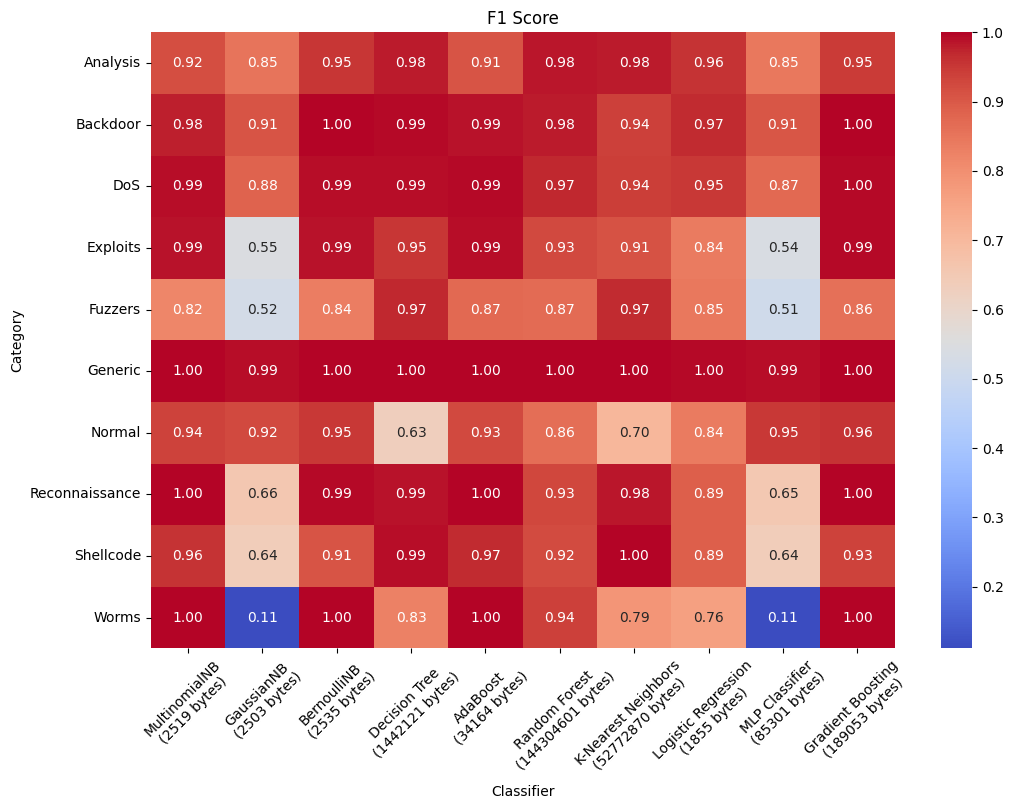

In [ ]:
pivot_df = category_results_df.pivot(index="Category", columns="Classifier", values="F1 Score")

classifier_names_with_size = [f"{name}\n({size} bytes)" for name, size in zip(results_df['Classifier'], results_df['Model Size (bytes)'])]
pivot_df.columns = classifier_names_with_size

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('F1 Score')
plt.xlabel('Classifier')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()